In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\Intellipaat\lms assignments\datasets\Flight_Booking\Flight_Booking.csv")
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# droping unwanted columns from the dataset
data = data.drop(columns=['Unnamed: 0'])
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#calculating statistical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
# checking the missing values 
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

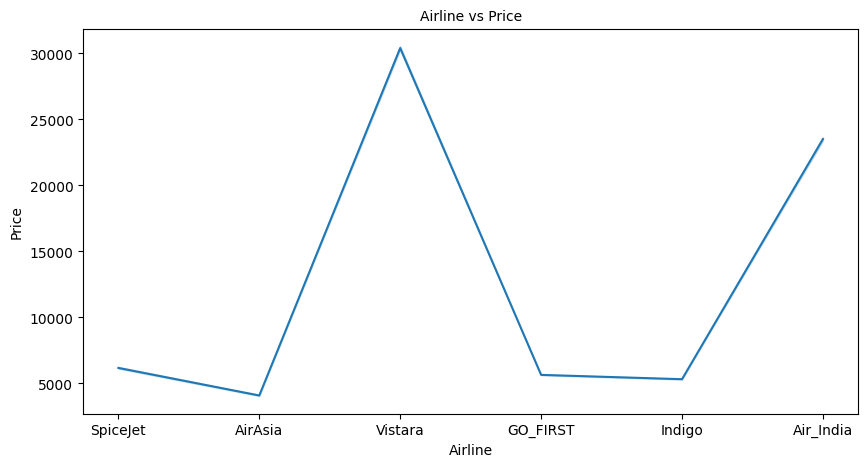

In [7]:
# Data visualization 
plt.figure(figsize=(10,5))
sns.lineplot(x = data['airline'],y = data['price'])
plt.title('Airline vs Price',fontsize = 10)
plt.xlabel('Airline',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.show()

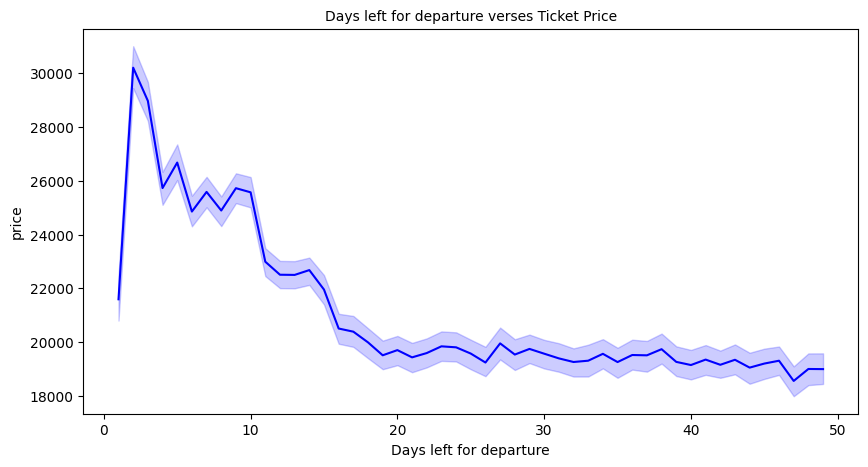

In [8]:
plt.figure(figsize = (10,5))
sns.lineplot(data = data, x = 'days_left', y = 'price',color = 'Blue')
plt.title('Days left for departure verses Ticket Price',fontsize = 10)
plt.xlabel('Days left for departure',fontsize = 10)
plt.ylabel('price',fontsize = 10)
plt.show()

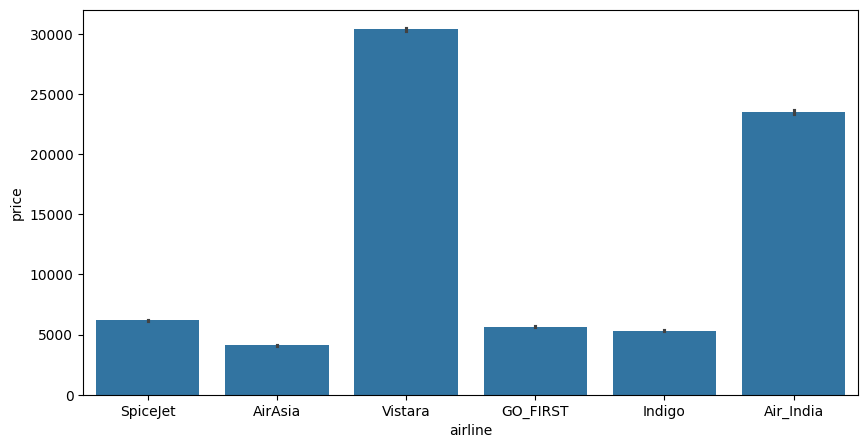

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'airline',y = 'price',data = data)
plt.show()

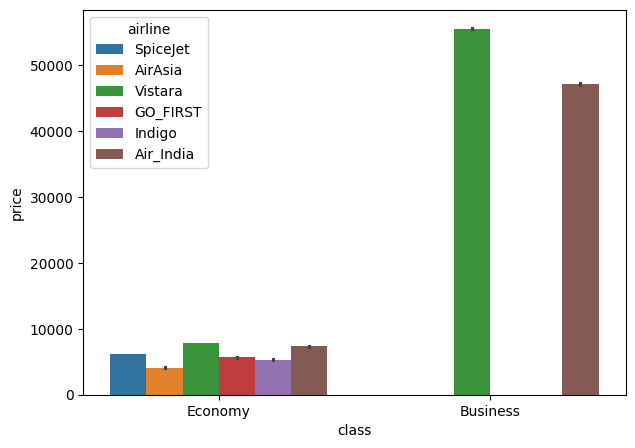

In [10]:
plt.figure(figsize = (7,5))
sns.barplot(data = data, x = 'class', y = 'price', hue = 'airline')
plt.show()

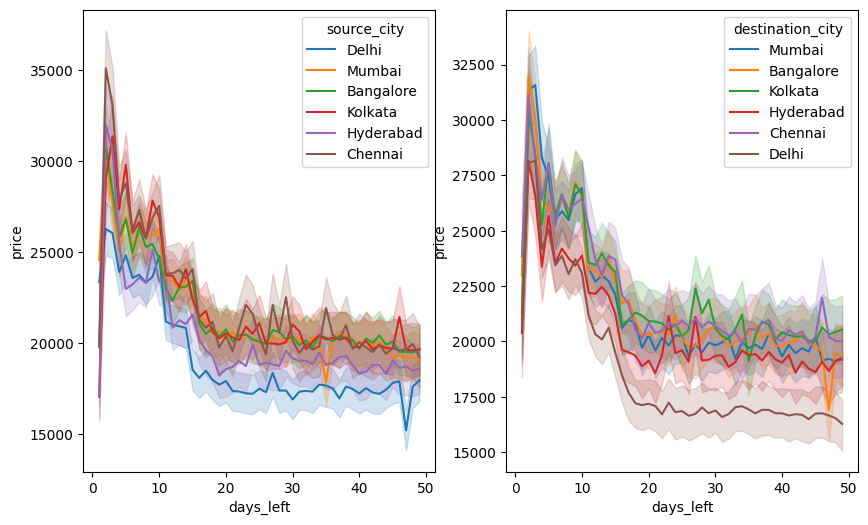

In [11]:
fig,ax=plt.subplots(1,2,figsize = (10,6))
sns.lineplot(data = data ,x = 'days_left', y = 'price',hue= 'source_city',ax = ax[0])
sns.lineplot(data = data ,x = 'days_left', y = 'price',hue = 'destination_city',ax = ax[1])
plt.show()

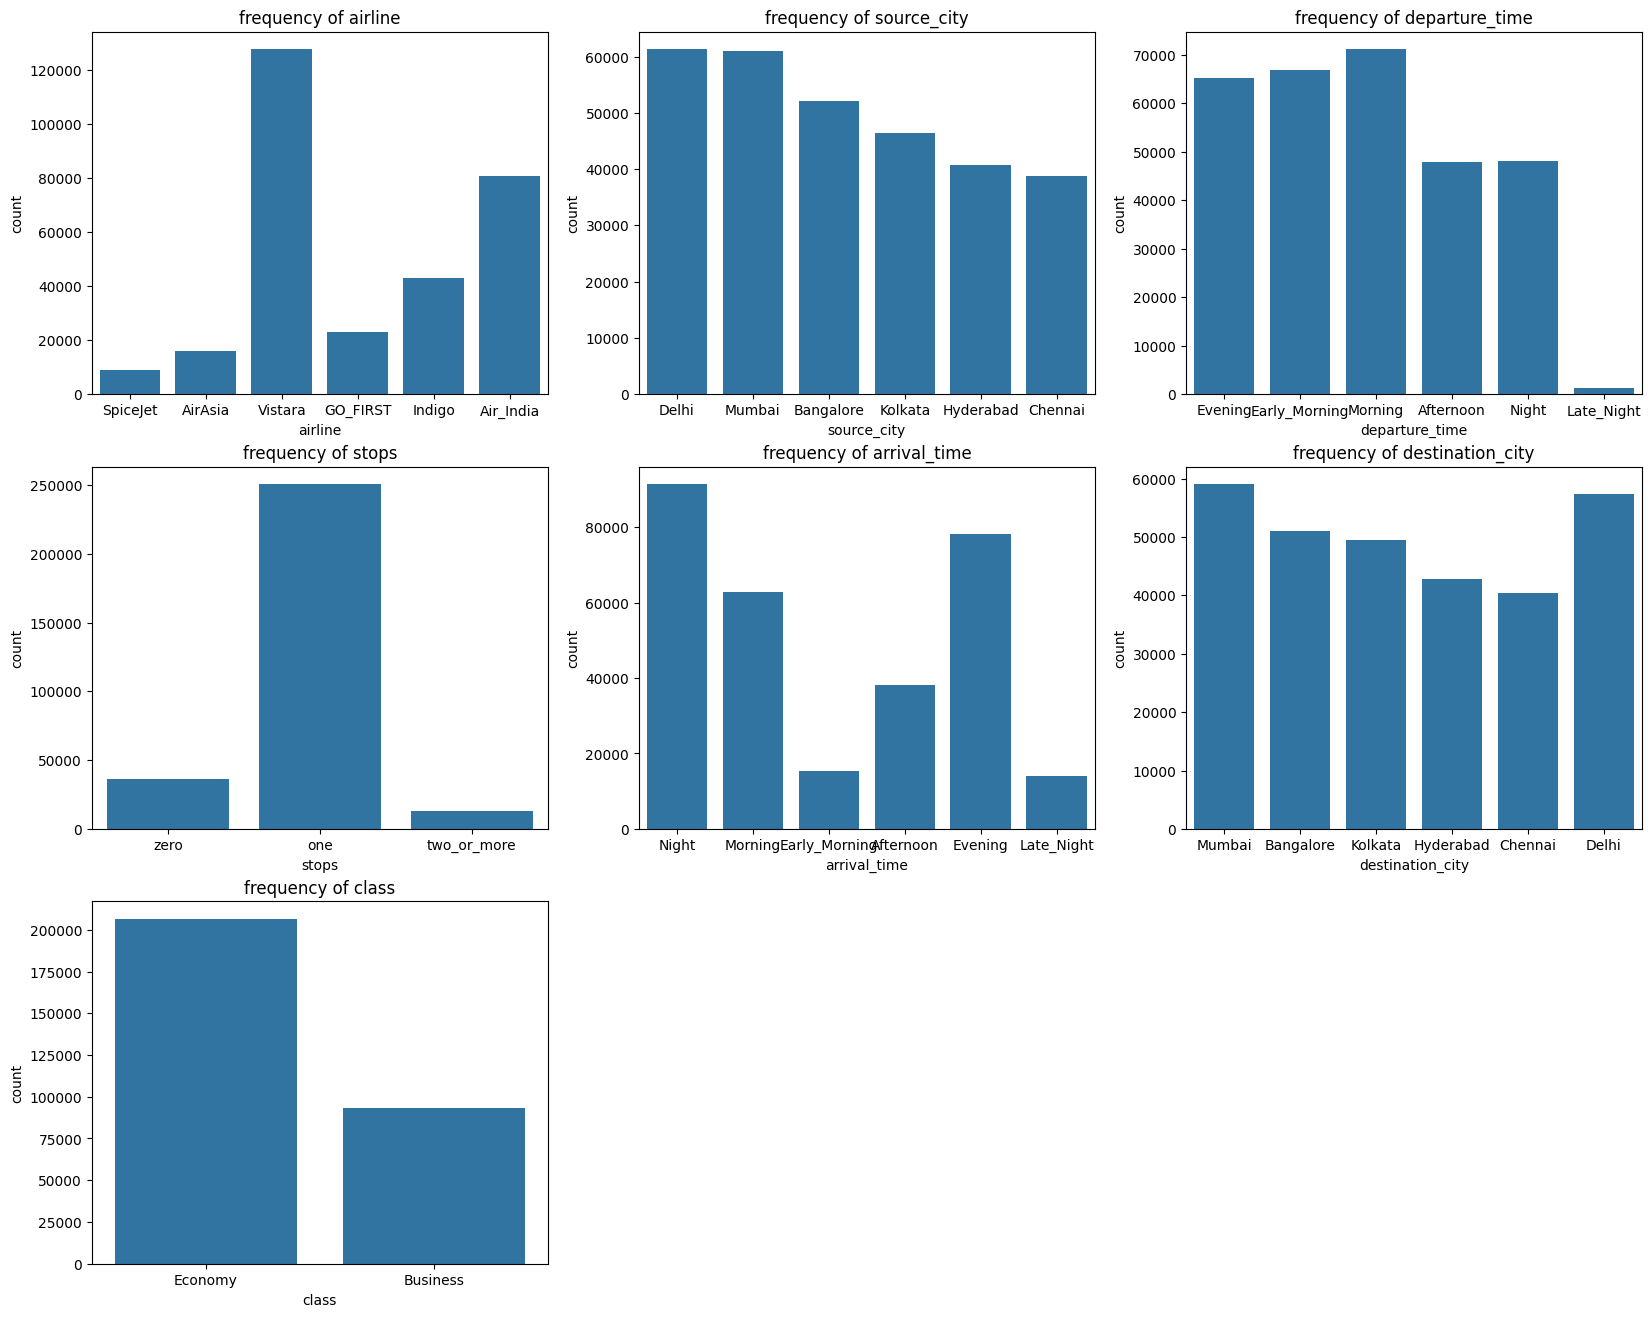

In [12]:
plt.figure(figsize = (20,16))

plt.subplot(3,3,1)
sns.countplot(data = data,x = 'airline')
plt.title('frequency of airline')

plt.subplot(3,3,2)
sns.countplot(data = data,x = 'source_city')
plt.title('frequency of source_city')

plt.subplot(3,3,3)
sns.countplot(data = data,x = 'departure_time')
plt.title('frequency of departure_time')

plt.subplot(3,3,4)
sns.countplot(data = data,x = 'stops')
plt.title('frequency of stops')

plt.subplot(3,3,5)
sns.countplot(data = data,x = 'arrival_time')
plt.title('frequency of arrival_time')

plt.subplot(3,3,6)
sns.countplot(data = data,x = 'destination_city')
plt.title('frequency of destination_city')

plt.subplot(3,3,7)
sns.countplot(data = data,x = 'class')
plt.title('frequency of class')
plt.show()

In [13]:
# Label Encoding 
le = LabelEncoder()
le

LabelEncoder()

In [14]:
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


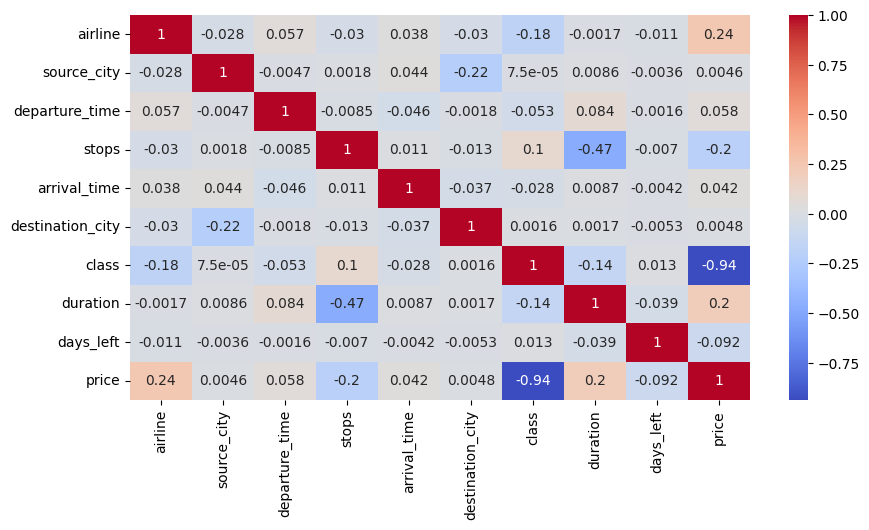

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm')
plt.show()

In [16]:
col_list = []

for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

print(vif_data)



           features       vif
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [17]:
data.drop(columns= ['flight'],inplace = True,axis =1)

In [18]:
x = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state= 42 )

In [20]:
model = LinearRegression()
sc = StandardScaler()

In [21]:
#StandardScaler
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
x_train,x_test,y_train,y_test

(array([[-1.15009744,  0.81160707, -1.37873905, ...,  0.67246146,
          1.00173042, -1.47488258],
        [-0.05891224, -0.33003243, -1.37873905, ...,  0.67246146,
         -0.72463441, -0.95897275],
        [-1.15009744,  0.81160707, -1.37873905, ..., -1.48707407,
          1.24497828,  1.32577077],
        ...,
        [-1.15009744,  0.81160707,  1.47332728, ...,  0.67246146,
          0.20248744,  0.22024971],
        [-0.60450484,  0.81160707, -1.37873905, ...,  0.67246146,
         -0.53976604,  0.95726375],
        [-1.15009744,  0.81160707, -1.37873905, ...,  0.67246146,
          1.1059795 , -0.66416714]]),
 array([[-1.15009744, -0.33003243,  0.90291402, ...,  0.67246146,
          1.04760002,  1.03096515],
        [ 1.03227296,  0.81160707,  0.90291402, ..., -1.48707407,
         -0.33126787,  1.17836796],
        [ 1.03227296,  0.81160707,  0.90291402, ...,  0.67246146,
         -0.23813869,  1.10466656],
        ...,
        [-1.15009744,  0.24078732, -0.80832578, ...,  

In [23]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_values','Predicted_values'])
difference

,Actual_values,Predicted_values
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [24]:
r2 = r2_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MAPE = mean_absolute_percentage_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [25]:
print(r2)
print(MAE)
print(MAPE)
print(MSE)
print(RMSE)

0.9045543507188158
4624.994868016802
0.43535810896832045
49200540.29372203
7014.309680483321


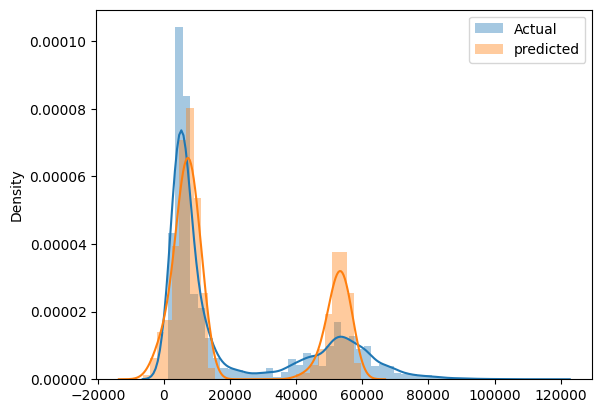

In [26]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label = 'predicted')
plt.legend()
plt.show()

In [27]:
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)
y_pred_dec = decision.predict(x_test)
r2_D= r2_score(y_test,y_pred)
MAE_D = metrics.mean_absolute_error(y_test,y_pred)
MAPE_D = mean_absolute_percentage_error(y_test,y_pred)
MSE_D = metrics.mean_squared_error(y_test,y_pred)
RMSE_D = np.sqrt(metrics.mean_squared_error(y_test,y_pred))


In [28]:
print(MAE_D)
print(r2_D)
print(MAPE_D)
print(MSE_D)
print(RMSE_D)

4624.994868016802
0.9045543507188158
0.43535810896832045
49200540.29372203
7014.309680483321


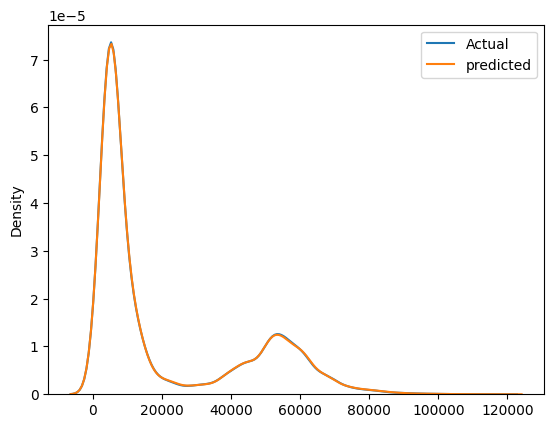

In [33]:
sns.kdeplot(y_test, label='Actual')
sns.kdeplot(y_pred_dec, label = 'predicted')
plt.legend()
plt.show()

In [30]:
ran = RandomForestRegressor()
ran.fit(x_train,y_train)
y_pred_ran = ran.predict(x_test)
r2_ran = r2_score(y_test,y_pred)
MAE_ran = metrics.mean_absolute_error(y_test,y_pred)
MAPE_ran = mean_absolute_percentage_error(y_test,y_pred)
MSE_ran = metrics.mean_squared_error(y_test,y_pred)
RMSE_ran = np.sqrt(metrics.mean_squared_error(y_test,y_pred))


In [31]:
print(MAE_ran)
print(r2_ran)
print(MAPE_ran)
print(MSE_ran)
print(RMSE_ran)

4624.994868016802
0.9045543507188158
0.43535810896832045
49200540.29372203
7014.309680483321


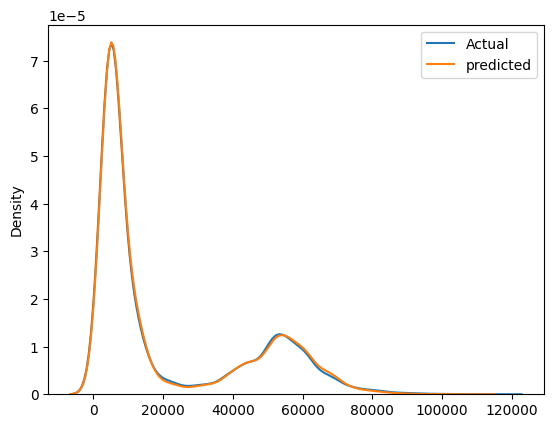

In [32]:
sns.kdeplot(y_test, label='Actual')
sns.kdeplot(y_pred_ran, label = 'predicted')
plt.legend()
plt.show()